Deeplerning で問題となるものの知識。

## 過学習

現在のデータセットに過度に最適化されすぎて、未知のデータに対処できなくなる問題。  
これはニューラルネットに限った話でもない。

同一のデータセットを学習させ続けることでも起きるが、ニューラルネットの場合以下のケースがある。

1. 少ないデータを学習に使い続ける  
  ニューロンの学習は1回で決まるものでもないので、エポック(データセット1週分)内の確率的というか平均というか…そんな特徴を捉えていく。  
  データ数が少ない場合、特徴を取り違える可能性がある。
2. ニューロン数を増やしすぎる  
  データセットにピッタリ合いすぎて、未知のデータに対応できなくなる。  
  ニューロン数が増える＝表現力が上がる…が上がった表現力が過剰にマッチする状態。
3. 階層を増やしすぎる  
  これも同じようなもの。

### 対策

1. ハイパーパラメータ（ニューロン数や学習係数なんかの定数のこと）を最適化していく。  
  まぁ要するにやりすぎになってそうならニューロン数とか減らす。
2. 学習の打ち切り  
  学習しすぎる前に処理を打ち切る。  
  検証用データセットの誤差を監視して、適当なところで学習を打ち切る。
3. 十分なデータを用意しよう。  
  いや、これが地味にきついんだけどね…。
4. データ拡張  
  データの水増し。例えば画像データなら、回転や反転した画像を使ってみるとか。
5. データ前処理  
  データを 0-1 に抑える（正規化）。統計値を使って標準偏差 1 になるように調整する(標準化)

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


def normalize(x):
    """正規化"""
    xmax = np.max(x)
    xmin = np.min(x)
    return (x - xmin) / (xmax - xmin)


def standardize(x):
    """標準化"""
    av = np.average(x)
    std = np.std(x)
    return (x - av) / std

## 局所最適解

局所的な最適解にハマって学習が停止し、全体最適解にたどり着けなくなる問題。

### 対策

1. 最適化アルゴリズムで回避する。  
  記事は [このへん](https://white-azalea.hatenablog.jp/entry/2021/03/03/203848) 。
2. 正則化する。  
  重みの値に制限を与える。（最大値/最小値など）  
  $ \sum_i w_{ij}^2 < c $ とか制限したり重みを減衰させる場合に $ E_w = E + \frac{\lambda}{2} || W ||^2 $ などする。
3. 重みやバイアスの初期値をランダムにしとく。


## 勾配喪失

3層以上でやってると、表層への伝播が弱くなりすぎてしまう問題。  
微分を繰り返すので、それによって値が小さくなり、最終的にほとんど学習できなくなってしまう。

例えばシグモイド関数だと $ f'(x) = (1-f(x))f(x) $ で MAX 0.25 そりゃ勾配少ないわけだ。



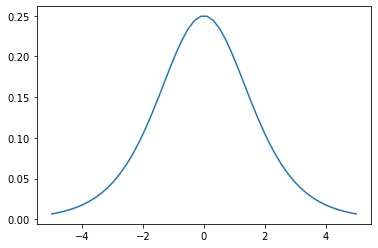

In [8]:
def sigmoid(u):
    return 1 / (1 + np.exp(-u))


def fdash(y):
    d = sigmoid(y)
    return (1 - d) * d


X = np.linspace(-5, 5)
Y = fdash(X)

plt.plot(X, Y)
plt.show()

### 対策

なんで、ReLU とかを使うらしい。